# Preparing the data for analysis¶


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\slack query\Dataset (2).csv")
df

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase
0,6403.0,Working Professionals,Fullstack Program,Closed,5/14/2021 1:09,5/14/2021 19:04,5/14/2021 8:51,trial phase
1,6415.0,Working Professionals,Backend Program,Duplicate,5/14/2021 10:12,5/14/2021 11:23,NaN,trial phase
2,6420.0,Working Professionals,Fullstack Program,Closed,5/14/2021 11:46,5/16/2021 0:09,5/14/2021 18:14,trial phase
3,6402.0,Student,Fullstack Program,Closed,5/14/2021 1:08,5/14/2021 19:04,5/14/2021 14:45,fullstack-phase-1
4,6423.0,Working Professionals,Fellowship Program,Closed,5/14/2021 12:17,5/14/2021 20:39,5/14/2021 12:21,trial phase
...,...,...,...,...,...,...,...,...
476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape



(481, 8)

In [4]:

df.head(2)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase
0,6403.0,Working Professionals,Fullstack Program,Closed,5/14/2021 1:09,5/14/2021 19:04,5/14/2021 8:51,trial phase
1,6415.0,Working Professionals,Backend Program,Duplicate,5/14/2021 10:12,5/14/2021 11:23,NaN,trial phase


# 1.Check the Datatypes and convert relevant columns to Date and Time format.

In [5]:
df.dtypes


# data type change

Ticket Id                float64
Student or WP             object
Program Name              object
Status (Ticket)           object
Created Time (Ticket)     object
Ticket Closed Time        object
First Response Time       object
Project Phase             object
dtype: object

In [6]:
df["Created Time (Ticket)"]=pd.to_datetime(df["Created Time (Ticket)"])
df["Ticket Closed Time"]=pd.to_datetime(df["Ticket Closed Time"],errors="coerce")
df["First Response Time"]=pd.to_datetime(df["First Response Time"])

In [7]:
df.dtypes

Ticket Id                       float64
Student or WP                    object
Program Name                     object
Status (Ticket)                  object
Created Time (Ticket)    datetime64[ns]
Ticket Closed Time       datetime64[ns]
First Response Time      datetime64[ns]
Project Phase                    object
dtype: object

#### all the relevant column is converted to datetime

# 2. Fill Missing Values with Appropriate Method.

In [8]:
df.isnull().sum().sort_values(ascending=False)

First Response Time      115
Ticket Closed Time        13
Ticket Id                  5
Student or WP              5
Program Name               5
Status (Ticket)            5
Created Time (Ticket)      5
Project Phase              5
dtype: int64

In [9]:
df.head(2)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase
0,6403.0,Working Professionals,Fullstack Program,Closed,2021-05-14 01:09:00,2021-05-14 19:04:00,2021-05-14 08:51:00,trial phase
1,6415.0,Working Professionals,Backend Program,Duplicate,2021-05-14 10:12:00,2021-05-14 11:23:00,NaT,trial phase


#### we are about to drop Ticket Id column because without value in ticket id column no further analysis is possible .

In [10]:
df.dropna(axis="rows",how="any",subset=["Ticket Id"],inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

First Response Time      110
Ticket Closed Time         8
Ticket Id                  0
Student or WP              0
Program Name               0
Status (Ticket)            0
Created Time (Ticket)      0
Project Phase              0
dtype: int64

### 
### After dealing with Ticket id column null values , now we have only  two column which have null values  

#### Because,in remaining record we dont have any null value in ticket id column so it is not good idea that we drop other values thats why it is good to replace with mean.

In [12]:
df["First Response Time"].fillna(df["First Response Time"].mean(),inplace=True)

In [13]:
df["Ticket Closed Time"].fillna(df["Ticket Closed Time"].mean(),inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

Ticket Id                0
Student or WP            0
Program Name             0
Status (Ticket)          0
Created Time (Ticket)    0
Ticket Closed Time       0
First Response Time      0
Project Phase            0
dtype: int64

### To deal with Ticket Closed Time and First Response Time column null value I replaced with mean of respective data

# 3 Check how many Students and Work Professionals are raising queries, who’s queries are more.

In [15]:
df.shape

(476, 8)

In [16]:


df["Student or WP"].value_counts().reset_index()


,Student or WP,count
0,Working Professionals,328
1,Student,148


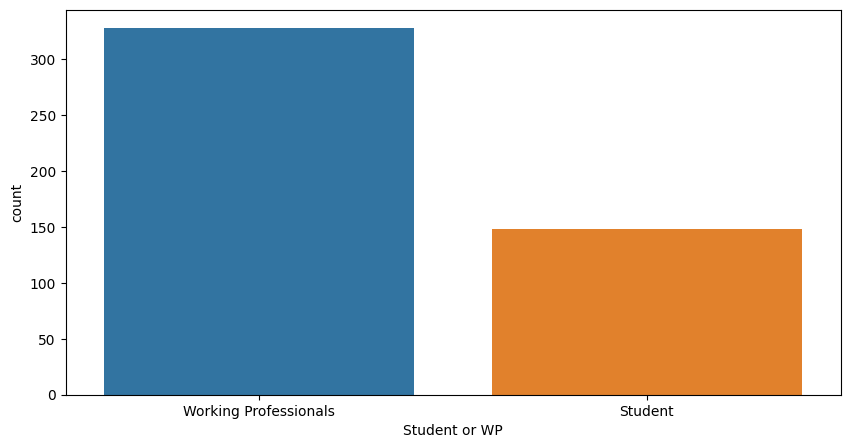

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x="Student or WP",hue="Student or WP",data=df)
plt.show()

### 148 students are raising queries and 328 working professionals are raising query

# 4.What is the Average time taken to respond to a query?

In [18]:
from datetime import datetime


In [19]:
time=df["First Response Time"]-df["Created Time (Ticket)"]

In [20]:
time

0                 0 days 07:42:00
1       3 days 15:06:34.590163712
2                 0 days 06:28:00
3                 0 days 13:37:00
4                 0 days 00:04:00
                  ...            
471               0 days 00:03:00
472               0 days 00:59:00
473   -3 days +02:08:34.590163712
474   -3 days +01:39:34.590163712
475               0 days 00:49:00
Length: 476, dtype: timedelta64[ns]

In [21]:
Average_time=time.sort_values().sum()/476
Average_time


Timedelta('0 days 06:06:50.976718504')

#### The average time to respond a query is 10:17:40.966386554

# 5.List down top 10 queries that took longest time to resolve.

In [22]:
df["duration"]=df["Ticket Closed Time"]-df["Created Time (Ticket)"]

In [23]:
df.sort_values("duration",ascending=False,inplace=True)

In [24]:
df.head(10)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,duration
41,6525.0,Student,Fullstack Program,Closed,2021-05-14 23:03:00,2021-05-21 17:53:00,2021-05-15 11:38:00,fullstack-phase-1,6 days 18:50:00
179,6748.0,Working Professionals,Backend Program,Closed,2021-05-16 20:49:00,2021-05-21 17:44:00,2021-05-18 18:16:00,backend-phase-3,4 days 20:55:00
7,6405.0,Student,Fullstack Program,Closed,2021-05-14 01:23:00,2021-05-18 19:15:00,2021-05-14 14:15:00,fullstack-phase-2,4 days 17:52:00
39,6505.0,Working Professionals,Backend Program,Closed,2021-05-14 20:38:00,2021-05-19 10:54:00,2021-05-14 20:44:00,backend-phase1,4 days 14:16:00
225,6776.0,Working Professionals,Backend Program,Closed,2021-05-17 10:26:00,2021-05-21 21:39:00,2021-05-18 18:16:00,fullstack-phase-1,4 days 11:13:00
65,6508.0,Working Professionals,Backend Program,Closed,2021-05-14 20:40:00,2021-05-18 22:11:00,2021-05-14 22:35:00,system-issues,4 days 01:31:00
102,6633.0,Student,Fullstack Program,Closed,2021-05-16 12:09:00,2021-05-20 11:24:00,2021-05-16 20:20:00,fullstack-phase-4,3 days 23:15:00
113,6642.0,Working Professionals,Backend Program,Closed,2021-05-16 12:10:00,2021-05-20 11:24:00,2021-05-16 12:11:00,backend-phase2,3 days 23:14:00
9,6411.0,Working Professionals,Backend Program,Closed,2021-05-14 02:15:00,2021-05-17 22:19:00,2021-05-14 11:54:00,backend-phase2,3 days 20:04:00
47,6548.0,Student,Fullstack Program,Closed,2021-05-15 10:38:00,2021-05-18 19:15:00,2021-05-15 12:28:00,trial phase,3 days 08:37:00


# 6. Which Phase of Project is having highest Queries?


In [25]:

df["Project Phase"].value_counts().reset_index().iloc[0:1]


,Project Phase,count
0,fullstack-phase-2,96


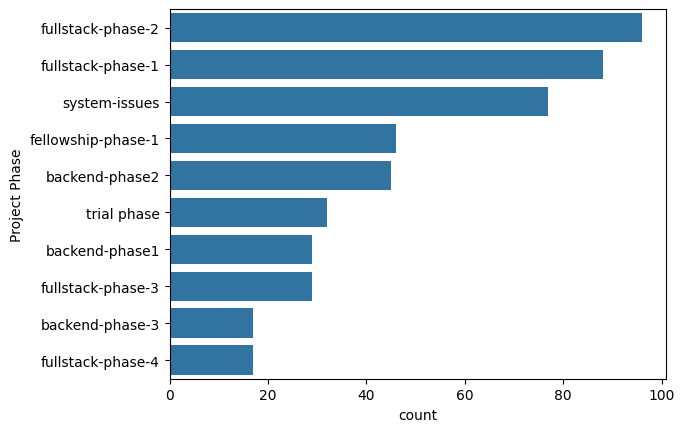

In [26]:
b=df["Project Phase"].value_counts().index
sns.barplot(x=df["Project Phase"].value_counts(),y=b)
plt.show()


# 7.Which project phase queries are taking a long time to resolve?

In [27]:
df["time"]=df["Ticket Closed Time"]-df["First Response Time"]

In [28]:
df["time"]=df["Ticket Closed Time"]-df["Created Time (Ticket)"]

In [29]:
df.head(2)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,duration,time
41,6525.0,Student,Fullstack Program,Closed,2021-05-14 23:03:00,2021-05-21 17:53:00,2021-05-15 11:38:00,fullstack-phase-1,6 days 18:50:00,6 days 18:50:00
179,6748.0,Working Professionals,Backend Program,Closed,2021-05-16 20:49:00,2021-05-21 17:44:00,2021-05-18 18:16:00,backend-phase-3,4 days 20:55:00,4 days 20:55:00


In [30]:
df[["time","Project Phase"]].groupby(by="Project Phase").sum().sort_values(by="time",ascending=False)

,time
Project Phase,
fullstack-phase-1,79 days 04:45:59.358974464
fullstack-phase-2,78 days 21:10:58.076923392
system-issues,52 days 07:10:58.717948928
backend-phase2,37 days 19:52:00
fellowship-phase-1,36 days 11:11:59.358974464
backend-phase1,27 days 06:02:00
trial phase,25 days 02:45:00
fullstack-phase-4,24 days 13:42:59.358974464
fullstack-phase-3,18 days 16:26:00


### fullstack phase-2  project phase is taking longest time to resolve

# 8. On which day highest queries were resolved?


In [31]:
df["ticket_close"]=df["Ticket Closed Time"].apply(lambda x:x.strftime("%d-%m-%Y"))

In [32]:
from datetime import datetime

a = '2021-05-18 19:24:00'
datetime_object = datetime.strptime(a, "%Y-%m-%d %H:%M:%S")

formatted_date = datetime_object.strftime("%d-%m-%Y")
print(formatted_date)


18-05-2021


In [33]:
datetime_object

datetime.datetime(2021, 5, 18, 19, 24)

In [34]:
df.head(2)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,duration,time,ticket_close
41,6525.0,Student,Fullstack Program,Closed,2021-05-14 23:03:00,2021-05-21 17:53:00,2021-05-15 11:38:00,fullstack-phase-1,6 days 18:50:00,6 days 18:50:00,21-05-2021
179,6748.0,Working Professionals,Backend Program,Closed,2021-05-16 20:49:00,2021-05-21 17:44:00,2021-05-18 18:16:00,backend-phase-3,4 days 20:55:00,4 days 20:55:00,21-05-2021


In [35]:
df["ticket_close"].value_counts()

ticket_close
18-05-2021    135
19-05-2021     91
16-05-2021     75
20-05-2021     66
17-05-2021     55
14-05-2021     23
21-05-2021     19
15-05-2021     11
22-05-2021      1
Name: count, dtype: int64

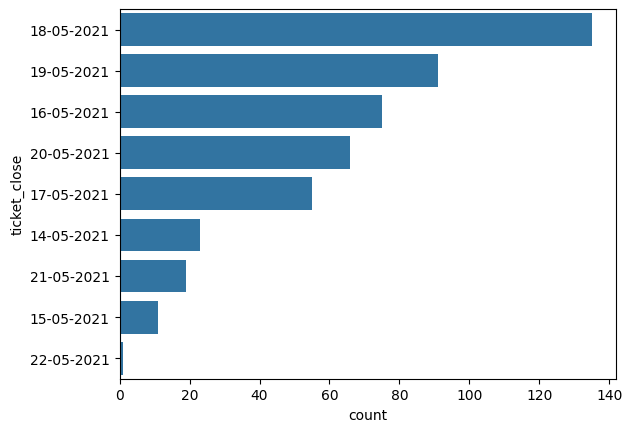

In [36]:
c=df["ticket_close"].value_counts().index
sns.barplot(x=df["ticket_close"].value_counts(),y=c)
plt.show()

### on date 18-05-2021 127 queries get solved

# 9. Which phase queries are easier to resolve?

In [37]:
df["easy_solve"]=df["Ticket Closed Time"]-df["Created Time (Ticket)"]

In [38]:
print(df[["Project Phase","easy_solve"]].groupby(by="Project Phase").sum().sort_values(by="easy_solve"))




                                   easy_solve
Project Phase                                
backend-phase-3              17 days 18:41:00
fullstack-phase-3            18 days 16:26:00
fullstack-phase-4  24 days 13:42:59.358974464
trial phase                  25 days 02:45:00
backend-phase1               27 days 06:02:00
fellowship-phase-1 36 days 11:11:59.358974464
backend-phase2               37 days 19:52:00
system-issues      52 days 07:10:58.717948928
fullstack-phase-2  78 days 21:10:58.076923392
fullstack-phase-1  79 days 04:45:59.358974464


In [39]:
df[["Project Phase","easy_solve"]].groupby('Project Phase').sum()


,easy_solve
Project Phase,
backend-phase-3,17 days 18:41:00
backend-phase1,27 days 06:02:00
backend-phase2,37 days 19:52:00
fellowship-phase-1,36 days 11:11:59.358974464
fullstack-phase-1,79 days 04:45:59.358974464
fullstack-phase-2,78 days 21:10:58.076923392
fullstack-phase-3,18 days 16:26:00
fullstack-phase-4,24 days 13:42:59.358974464
system-issues,52 days 07:10:58.717948928


In [40]:
df[['Program Name','Project Phase','easy_solve']].groupby(['Program Name','Project Phase']).sum()


easy_solve
Program Name       Project Phase                                 
Backend Program    backend-phase-3               17 days 18:41:00
                   backend-phase1                27 days 06:02:00
                   backend-phase2                37 days 19:52:00
                   fellowship-phase-1             2 days 03:18:00
                   fullstack-phase-1              7 days 19:52:00
                   fullstack-phase-2             12 days 19:00:00
                   system-issues       30 days 04:13:59.358974464
                   trial phase                   13 days 03:05:00
Fellowship Program fellowship-phase-1  32 days 06:52:59.358974464
                   fullstack-phase-1  -1 days +06:04:59.358974464
                   system-issues        3 days 22:37:59.358974464
                   trial phase                    0 days 08:22:00
Fullstack Program  fellowship-phase-1             2 days 01:01:00
                   fullstack-phase-1             72 days 02:49:00
                   fullstack-phase-2   66 days 02:10:58.076923392
                   fullstack-phase-3             18 days 16:26:00
                   fullstack-phase-4   24 days 13:42:59.358974464
                   system-issues                 18 days 04:19:00
                   trial phase                   11 days 15:18:00

### backend phase  project phase is easy to solve 

# 10.Provide Conclusion for your analysis.

#### As per dataset provided, we have some queries to figure out from the dataset. in the dataset there is more working professional than student thats why their query is also more.average time for figuring out the query is about 10hrs which is great. 4 out of top 10 queries which took more time to resolve are system issue.on the date 18-05-2021 127 queries solved and in last most easy query to resolve was backend-phase-3.
  